# Part (a)
To find the mean (μ) for the three coins, we need to understand that each coin is flipped 10 times independently. Since the coins are fair, the probability of getting heads or tails is 0.5. The fraction of heads for each coin is a binomial distribution with 10 trials and a probability of success (getting heads) of 0.5.

The mean of a binomial distribution is given by μ = np, where n is the number of trials and p is the probability of success. In this case, μ = 10 * 0.5 = 5. Since we're interested in the fraction of heads, we divide the mean by the number of trials, so μ = 5/10 = 0.5.

Therefore, the mean (μ) for all three coins (c1, Crand, and Cmin) is 0.5.



# Part (b)

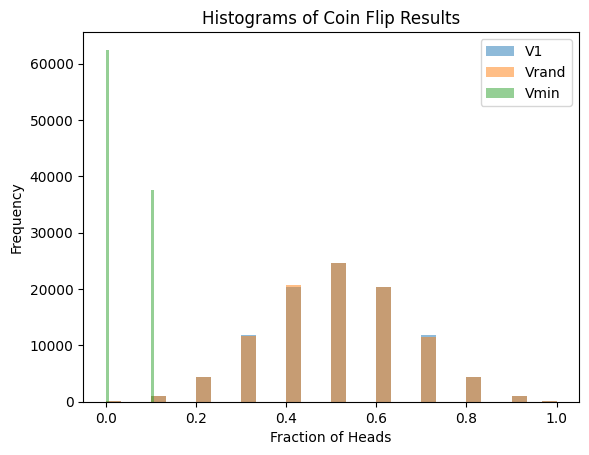

In [11]:
import numpy as np
import matplotlib.pyplot as plt

num_runs = 100000
num_coins = 1000
flips_per_coin = 10

V1_list = []
Vrand_list = []
Vmin_list = []

for _ in range(num_runs):
    results = np.random.binomial(flips_per_coin, 0.5, num_coins)
    V1 = results[0] / flips_per_coin
    Vrand_index = np.random.randint(0, num_coins)
    Vrand = results[Vrand_index] / flips_per_coin
    Vmin_index = np.argmin(results)
    Vmin = results[Vmin_index] / flips_per_coin

    V1_list.append(V1)
    Vrand_list.append(Vrand)
    Vmin_list.append(Vmin)

plt.hist(V1_list, bins=30, alpha=0.5, label='V1')
plt.hist(Vrand_list, bins=30, alpha=0.5, label='Vrand')
plt.hist(Vmin_list, bins=30, alpha=0.5, label='Vmin')
plt.legend()
plt.title('Histograms of Coin Flip Results')
plt.xlabel('Fraction of Heads')
plt.ylabel('Frequency')
plt.show()

# Part (c)

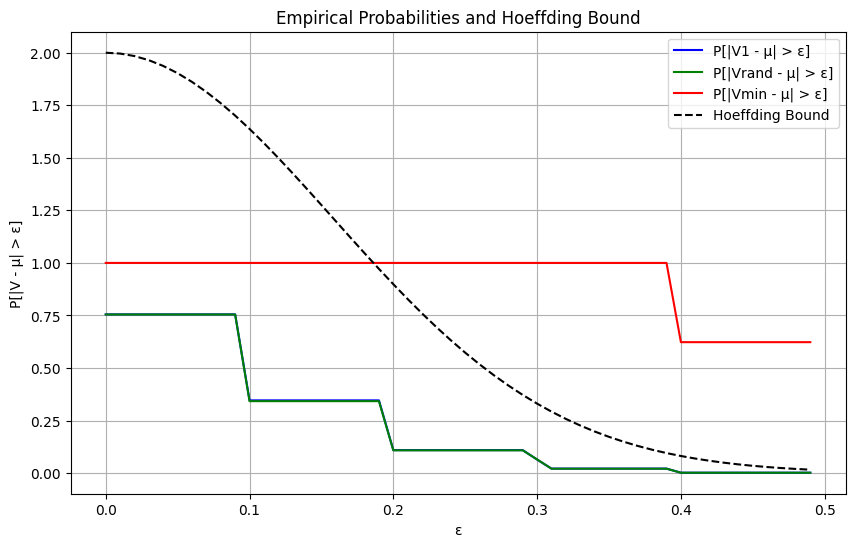

In [10]:
V1_array = np.array(V1_list)
Vrand_array = np.array(Vrand_list)
Vmin_array = np.array(Vmin_list)

# Function to calculate P[|V - mu| > epsilon]
def calculate_probability(V_array, mu, epsilon):
    return np.mean(np.abs(V_array - mu) > epsilon)

# range of epsilon values
epsilon_values = np.arange(0, 0.5, 0.01)

# empirical probabilities for each epsilon
P_V1 = [calculate_probability(V1_array, 0.5, epsilon) for epsilon in epsilon_values]
P_Vrand = [calculate_probability(Vrand_array, 0.5, epsilon) for epsilon in epsilon_values]
P_Vmin = [calculate_probability(Vmin_array, 0.5, epsilon) for epsilon in epsilon_values]

# Hoeffding bound: 2 * exp(-2 * epsilon^2 * N), where N is the number of flips (10 in this case)
N = flips_per_coin
hoeffding_bound = 2 * np.exp(-2 * epsilon_values**2 * N)

plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, P_V1, label="P[|V1 - μ| > ε]", color='blue')
plt.plot(epsilon_values, P_Vrand, label="P[|Vrand - μ| > ε]", color='green')
plt.plot(epsilon_values, P_Vmin, label="P[|Vmin - μ| > ε]", color='red')
plt.plot(epsilon_values, hoeffding_bound, label="Hoeffding Bound", color='black', linestyle='--')

plt.xlabel('ε')
plt.ylabel('P[|V - μ| > ε]')
plt.title('Empirical Probabilities and Hoeffding Bound')
plt.legend()
plt.grid(True)
plt.show()


# Part (d)
**Coins that obey the Hoeffding bound**:
  
  **V1 (First coin)** and **Vrand (Randomly chosen coin)** obey the Hoeffding bound because they are selected independently of the outcomes and follow the expected distribution for fair coins.
  
**Coin that does not obey the Hoeffding bound**:

   **Vmin (Coin with the minimum heads)** does not obey the Hoeffding bound due to **selection bias**. It is chosen based on having the fewest heads, leading to greater deviations than predicted by the bound.